In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [8]:
from src.data_loader import load_data
from src.preprocess import compute_attendance
from src.regression_models import linear_regression, polynomial_regression
from src.evaluation import evaluate, correlation
from src.visualization import scatter_with_line


In [9]:
df = load_data("../data/marks.csv")
df = compute_attendance(df)

df.head()


,Regd,sem1_attended,sem1_total,sgpa1,sem2_attended,sem2_total,sgpa2,sem1_attendance,sem2_attendance
0,2024000139,405,414,8.05,379,477,7.45,97.826087,79.454927
1,2024000238,319,419,4.55,338,475,6.95,76.133652,71.157895
2,2024000276,299,405,3.25,353,469,5.55,73.827160,75.266525
3,2024000783,27,271,0.00,302,421,4.23,9.963100,71.733967
4,2024000818,402,409,7.85,458,471,8.36,98.288509,97.239915


In [10]:
corr_sem1 = correlation(df["sem1_attendance"], df["sgpa1"])
corr_sem2 = correlation(df["sem2_attendance"], df["sgpa2"])

print(f"Pearson Correlation (Sem 1): {corr_sem1:.4f}")
print(f"Pearson Correlation (Sem 2): {corr_sem2:.4f}")


Pearson Correlation (Sem 1): 0.5647
Pearson Correlation (Sem 2): 0.4933


In [11]:
def run_semester(df, att_col, sgpa_col, label):
    print(f"\n===================== {label} =====================")

    X = df[att_col].values.reshape(-1, 1)
    y = df[sgpa_col].values

    # ----- Linear regression -----
    lin_model = linear_regression(X, y)
    y_pred_lin = lin_model.predict(X)
    r2_lin = evaluate(y, y_pred_lin)

    print("\nLinear Regression:")
    print(f"Equation: SGPA = {lin_model.intercept_:.3f} + "
          f"{lin_model.coef_[0]:.3f} * Attendance")
    print(f"R² Score: {r2_lin:.4f}")

    # plot linear fit
    scatter_with_line(X, y, lin_model)

    # ----- Polynomial regression (degree 2) -----
    poly_model, poly = polynomial_regression(X, y, degree=2)
    X_poly = poly.transform(X)
    y_pred_poly = poly_model.predict(X_poly)
    r2_poly = evaluate(y, y_pred_poly)

    print("\nPolynomial Regression (Degree 2):")
    print(f"Equation: SGPA = {poly_model.intercept_:.3f} + "
          f"{poly_model.coef_[1]:.3f}*A + {poly_model.coef_[2]:.5f}*A²")
    print(f"R² Score: {r2_poly:.4f}")



===================== SEMESTER 1 =====================

Linear Regression:
Equation: SGPA = -1.835 + 0.105 * Attendance
R² Score: 0.3188


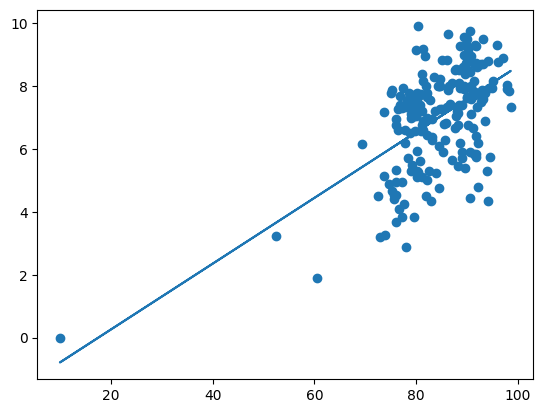


Polynomial Regression (Degree 2):
Equation: SGPA = -1.655 + 0.099*A + 0.00004*A²
R² Score: 0.3189

===================== SEMESTER 2 =====================

Linear Regression:
Equation: SGPA = -3.437 + 0.125 * Attendance
R² Score: 0.2434


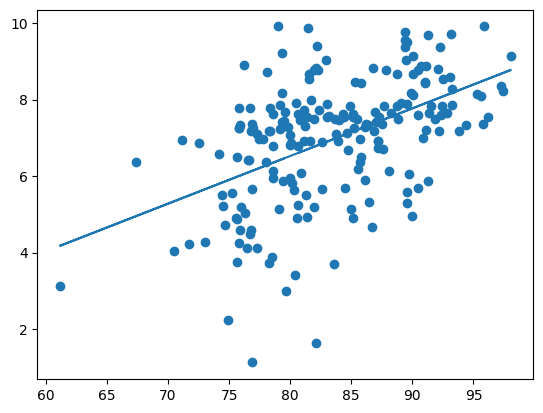


Polynomial Regression (Degree 2):
Equation: SGPA = -15.866 + 0.424*A + -0.00180*A²
R² Score: 0.2471


In [12]:
run_semester(df, "sem1_attendance", "sgpa1", "SEMESTER 1")
run_semester(df, "sem2_attendance", "sgpa2", "SEMESTER 2")